# 11 — Mini Project: Exploratory Data Analysis

## Project brief
Analyze a synthetic retail dataset and answer business questions.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(7)

n = 200
categories = ["Electronics", "Clothing", "Home", "Sports"]

df = pd.DataFrame({
    "category": rng.choice(categories, size=n, p=[0.3, 0.25, 0.25, 0.2]),
    "price": rng.normal(80, 25, size=n).clip(5, 300),
    "quantity": rng.integers(1, 6, size=n),
})
df["revenue"] = df["price"] * df["quantity"]
df.head()

,category,price,quantity,revenue
0,Home,103.034587,2,206.069174
1,Sports,68.609559,1,68.609559
2,Home,117.874325,1,117.874325
3,Electronics,48.835174,5,244.175868
4,Clothing,101.543077,2,203.086154


In [11]:
# Questions:
# 1) Which category generates highest total revenue?
# 2) What is average order value by category?
# 3) Are there outliers in price?

summary = df.groupby("category").agg(
    total_revenue=("revenue", "sum"),
    avg_order_value=("revenue", "mean"),
    avg_price=("price", "mean"),
).sort_values("total_revenue", ascending=False)

summary

,total_revenue,avg_order_value,avg_price
category,,,
Electronics,12618.627427,221.379429,78.660546
Home,12344.573661,262.650503,81.947679
Clothing,12212.531397,234.856373,75.850188
Sports,10125.179576,230.117718,77.653694


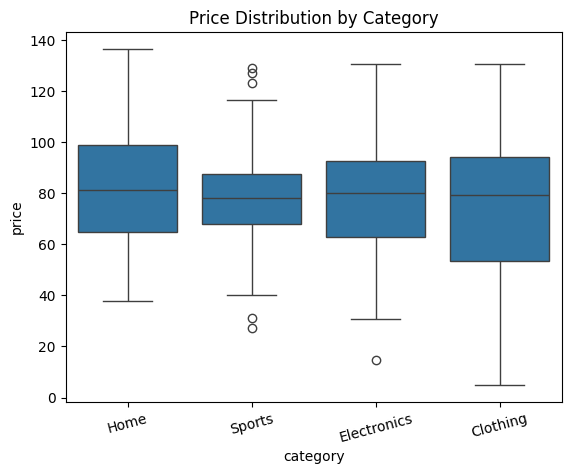

In [12]:
sns.boxplot(data=df, x="category", y="price")
plt.title("Price Distribution by Category")
plt.xticks(rotation=15)
plt.show()

## Deliverable
Write a short 3–5 bullet summary of findings and one recommendation.

- **Data sample:** Small, limited datasets were used (scores and synthetic samples), so observed patterns may not generalize.  
- **Distribution:** Score histograms show scores clustered within a narrow range (approx. mid-60s to mid-90s) with no strong skew in these examples.  
- **Pass rate:** Applying `pass` if score ≥ 75 yields about 60% pass (3 of 5) in the sample — a useful quick metric for cohort performance.  
- **Model stability:** Regression metrics (MAE, R²) varied noticeably with `test_size` on the small dataset, indicating high variance and unstable estimates.

- **Recommendation:** Use k‑fold cross‑validation and collect more data (or augment samples) before trusting model performance; report mean ± standard deviation of metrics rather than single train/test splits.